<a href="https://colab.research.google.com/github/TbRaihan/33333210079_Tb.Raihan_C/blob/main/3333210047_Tb.Raihan_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [4]:
!gdown 1s3xKkY8aIuJaT0zkJuoyk_mrAlirLyUS

Downloading...
From: https://drive.google.com/uc?id=1s3xKkY8aIuJaT0zkJuoyk_mrAlirLyUS
To: /content/imdb_movies.csv
100% 6.72M/6.72M [00:00<00:00, 28.8MB/s]


In [5]:
import pandas as pd
dataset = pd.read_csv('/content/imdb_movies.csv')
dataset

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


## 2. Exploratory Data

In [6]:
dataset.shape

(10178, 12)

In [7]:
dataset.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [8]:
dataset.dtypes

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [10]:
dataset.nunique()

names         9660
date_x        5688
score           79
genre         2303
overview      9905
crew          9927
orig_title    9736
status           3
orig_lang       54
budget_x      2316
revenue       8227
country         60
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [11]:
dataset.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [13]:
dataset['score'].dtypes

dtype('float64')

In [14]:
dataset['budget_x'].dtypes

dtype('float64')

In [15]:
dataset['revenue'].dtypes

dtype('float64')

Perform imputer to handle missing value in numerical data

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [17]:
imputer = imputer.fit(dataset[['score','budget_x','revenue']])
imputer

SimpleImputer()

In [18]:
dataset[['score','budget_x','revenue']] = imputer.transform(dataset[['score','budget_x','revenue']])
dataset.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

Using drop column tohandle missing value on categorical or object data

In [19]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

names         0
date_x        0
score         0
overview      0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

In [20]:
dataset = dataset.drop('revenue', axis=1)
dataset

,names,date_x,score,overview,orig_title,status,orig_lang,budget_x,country
0,Creed III,03/02/2023,73.0,"After dominating the boxing world, Adonis Cree...",Creed III,Released,English,75000000.0,AU
1,Avatar: The Way of Water,12/15/2022,78.0,Set more than a decade after the events of the...,Avatar: The Way of Water,Released,English,460000000.0,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"While working underground to fix a water main,...",The Super Mario Bros. Movie,Released,English,100000000.0,AU
3,Mummies,01/05/2023,70.0,"Through a series of unfortunate events, three ...",Momias,Released,"Spanish, Castilian",12300000.0,AU
4,Supercell,03/17/2023,61.0,Good-hearted teenager William always lived in ...,Supercell,Released,English,77000000.0,US
...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,"In 1979 Santa Barbara, California, Dorothea Fi...",20th Century Women,Released,English,7000000.0,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,When DEA agents are taken captive by a ruthles...,Delta Force 2: The Colombian Connection,Released,English,9145817.8,US
10175,The Russia House,12/21/1990,61.0,"Barley Scott Blair, a Lisbon-based editor of R...",The Russia House,Released,English,21800000.0,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,Darkman and Durant return and they hate each o...,Darkman II: The Return of Durant,Released,English,116000000.0,US


## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [21]:
dataset.describe()

,score,budget_x
count,10178.000000,1.017800e+04
mean,63.497052,6.488238e+07
std,13.537012,5.707565e+07
min,0.000000,1.000000e+00
25%,59.000000,1.500000e+07
50%,65.000000,5.000000e+07
75%,71.000000,1.050000e+08
max,100.000000,4.600000e+08


<Axes: >

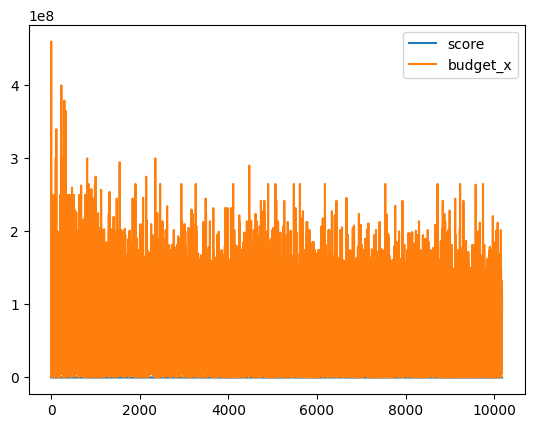

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

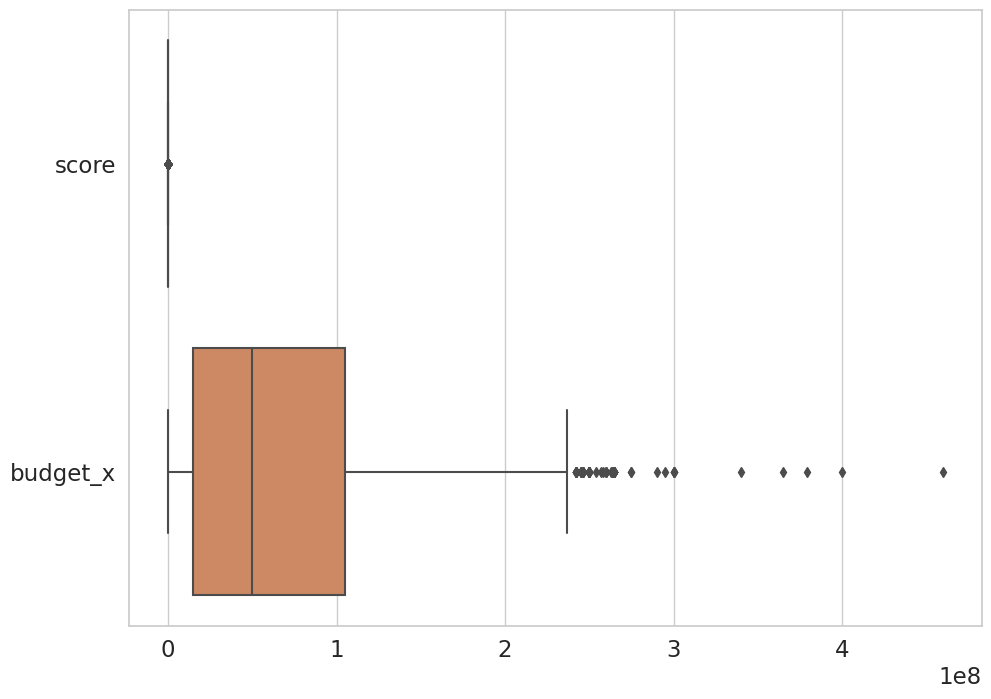

In [23]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

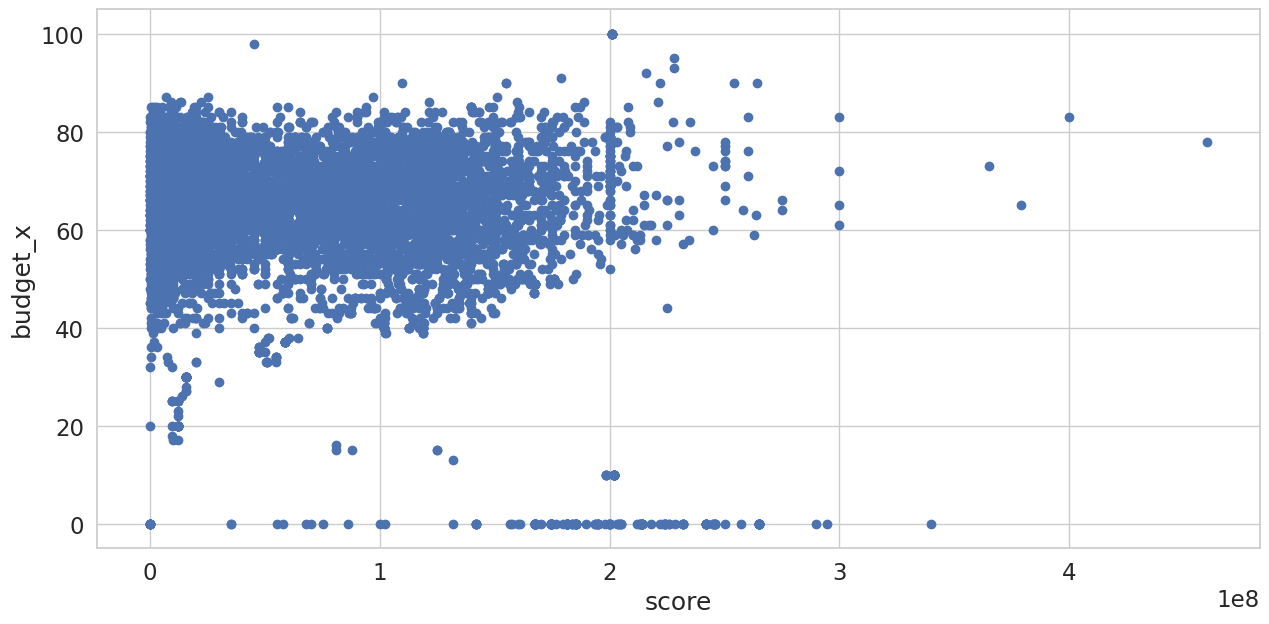

In [26]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['budget_x'], dataset['score'])
 
# x-axis label
ax.set_xlabel('score')
 
# y-axis label
ax.set_ylabel('budget_x')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [27]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['budget_x'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['budget_x'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (10178, 9)


In [28]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['budget_x'] > upper].index
outliers_lower = dataset[dataset['budget_x'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (10113, 9)


In [29]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['score'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['score'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (10113, 9)


In [30]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['score'] > upper].index
outliers_lower = dataset[dataset['score'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (9735, 9)


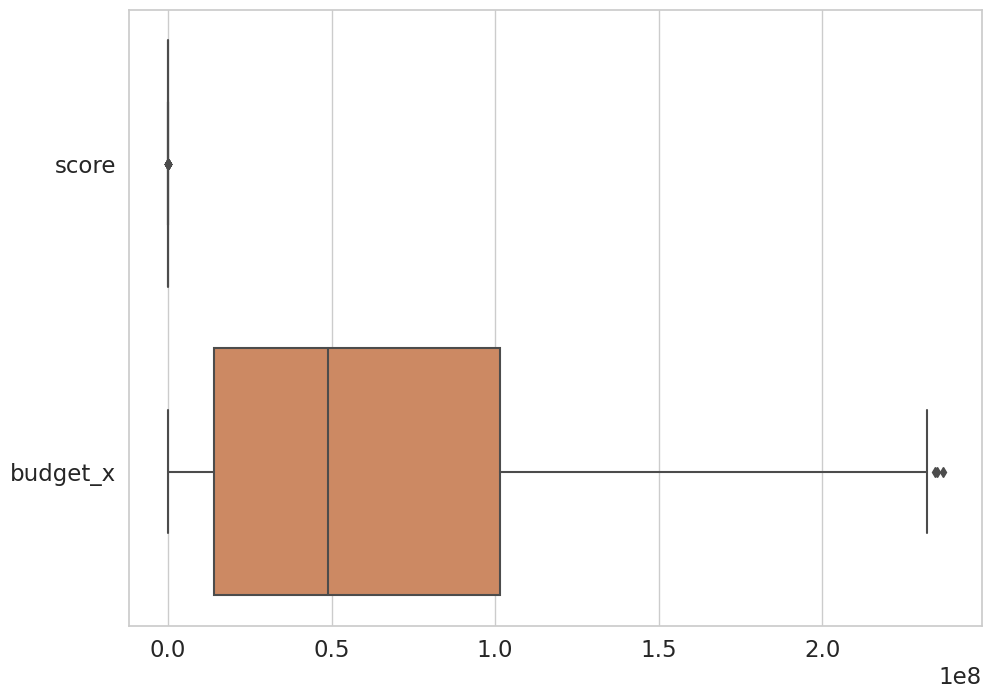

In [31]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

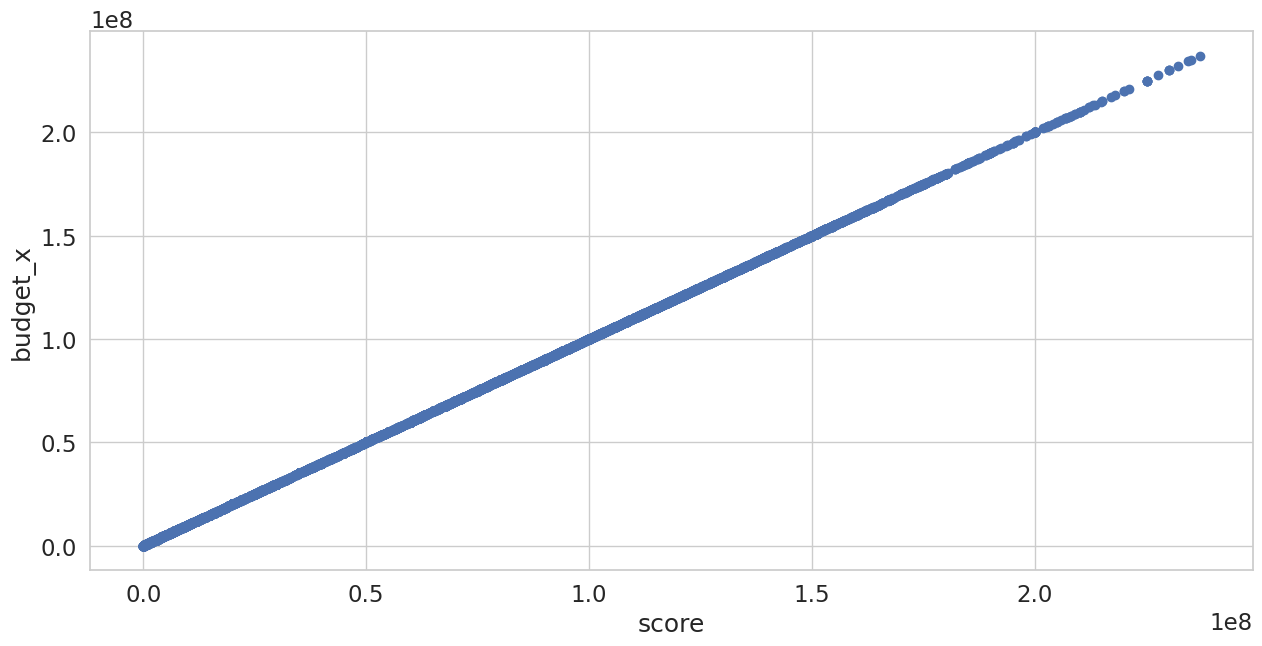

In [32]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['budget_x'], dataset['budget_x'])
 
# x-axis label
ax.set_xlabel('score')
 
# y-axis label
ax.set_ylabel('budget_x')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

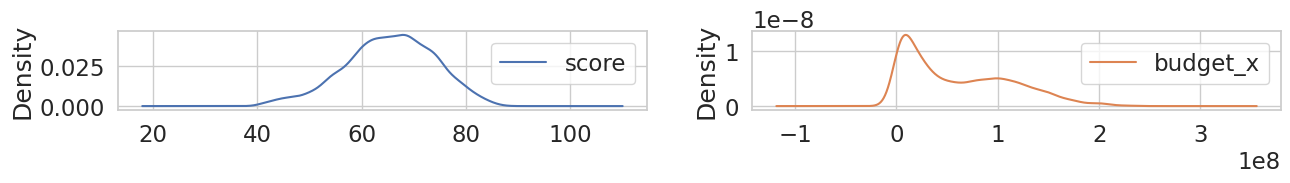

In [33]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

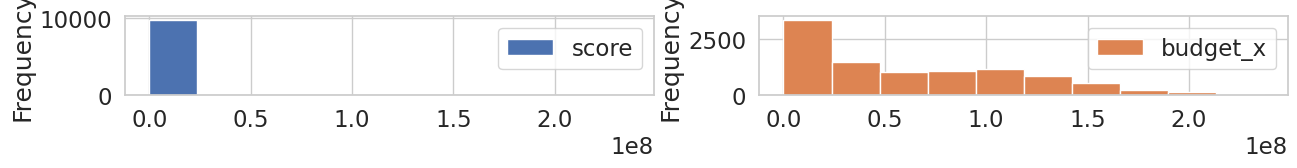

In [34]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

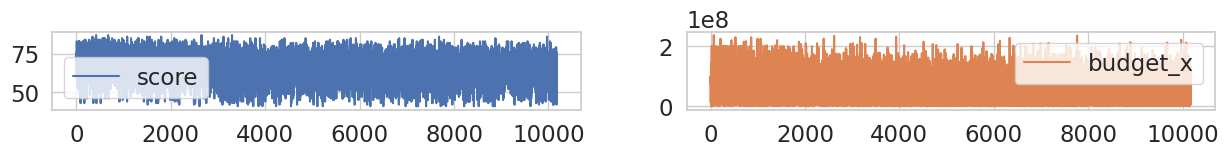

In [35]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

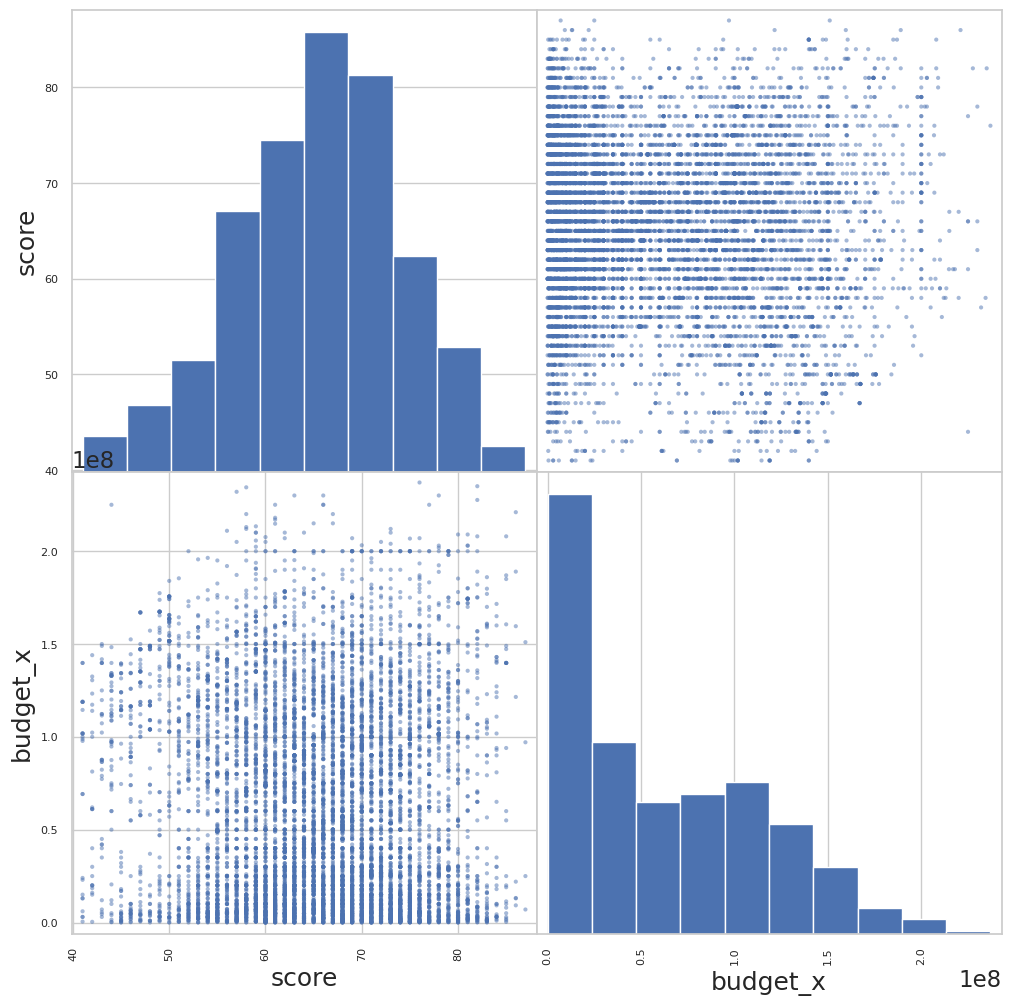

In [36]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

<ipython-input-37-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


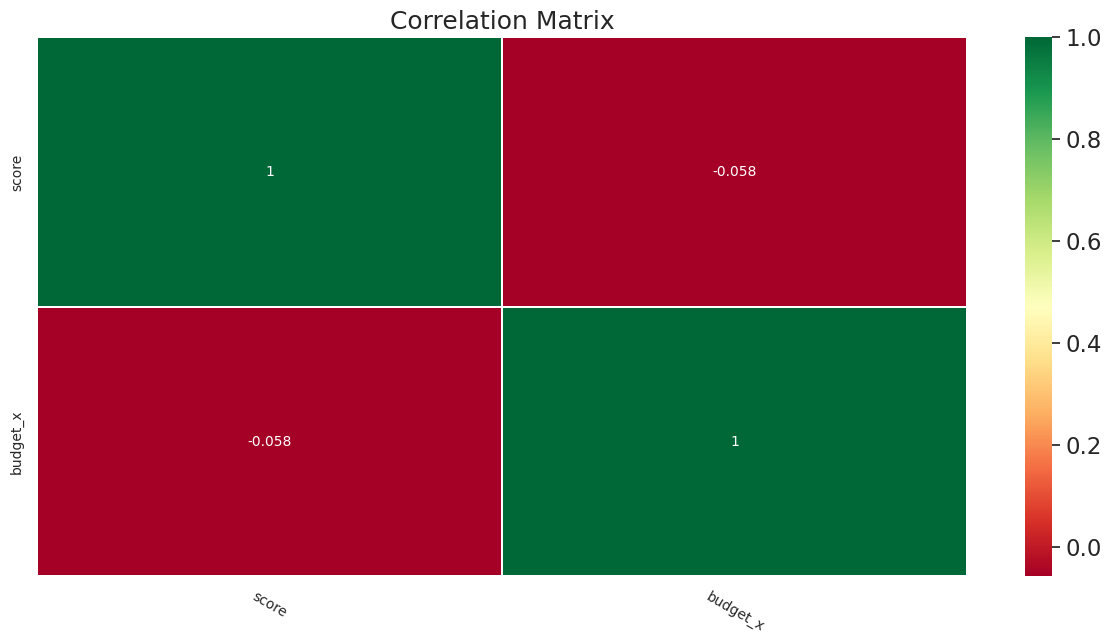

In [37]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [38]:
x = dataset.drop('score', axis=1)
x

,names,date_x,overview,orig_title,status,orig_lang,budget_x,country
0,Creed III,03/02/2023,"After dominating the boxing world, Adonis Cree...",Creed III,Released,English,75000000.0,AU
2,The Super Mario Bros. Movie,04/05/2023,"While working underground to fix a water main,...",The Super Mario Bros. Movie,Released,English,100000000.0,AU
3,Mummies,01/05/2023,"Through a series of unfortunate events, three ...",Momias,Released,"Spanish, Castilian",12300000.0,AU
4,Supercell,03/17/2023,Good-hearted teenager William always lived in ...,Supercell,Released,English,77000000.0,US
5,Cocaine Bear,02/23/2023,"Inspired by a true story, an oddball group of ...",Cocaine Bear,Released,English,35000000.0,AU
...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,"In 1979 Santa Barbara, California, Dorothea Fi...",20th Century Women,Released,English,7000000.0,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,When DEA agents are taken captive by a ruthles...,Delta Force 2: The Colombian Connection,Released,English,9145817.8,US
10175,The Russia House,12/21/1990,"Barley Scott Blair, a Lisbon-based editor of R...",The Russia House,Released,English,21800000.0,US
10176,Darkman II: The Return of Durant,07/11/1995,Darkman and Durant return and they hate each o...,Darkman II: The Return of Durant,Released,English,116000000.0,US


Choose feature Type as a label

In [39]:
y = dataset["score"]
y

0        73.0
2        76.0
3        70.0
4        61.0
5        66.0
         ... 
10173    73.0
10174    54.0
10175    61.0
10176    55.0
10177    70.0
Name: score, Length: 9735, dtype: float64

In [40]:
y.values.reshape(-1,1)

array([[73.],
       [76.],
       [70.],
       ...,
       [61.],
       [55.],
       [70.]])

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [41]:
x = pd.get_dummies(x)
x

,budget_x,names_#Alive,names_#FBF,names_'71,names_(500) Days of Summer,names_*batteries not included,"names_...Watch Out, We're Mad",names_10,names_10 Cloverfield Lane,names_10 Days of a Good Man,...,country_SU,country_TH,country_TR,country_TW,country_UA,country_US,country_UY,country_VN,country_XC,country_ZA
0,75000000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100000000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12300000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,77000000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,35000000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,7000000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10174,9145817.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10175,21800000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10176,116000000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
x.shape

(9735, 33722)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [43]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,33712,33713,33714,33715,33716,33717,33718,33719,33720,33721
0,0.259464,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,...,-0.022669,-0.051749,-0.039284,-0.033634,-0.020275,-0.610470,-0.010136,-0.010136,-0.010136,-0.017557
1,0.735871,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,...,-0.022669,-0.051749,-0.039284,-0.033634,-0.020275,-0.610470,-0.010136,-0.010136,-0.010136,-0.017557
2,-0.935363,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,...,-0.022669,-0.051749,-0.039284,-0.033634,-0.020275,-0.610470,-0.010136,-0.010136,-0.010136,-0.017557
3,0.297577,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,...,-0.022669,-0.051749,-0.039284,-0.033634,-0.020275,1.638083,-0.010136,-0.010136,-0.010136,-0.017557
4,-0.502786,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,...,-0.022669,-0.051749,-0.039284,-0.033634,-0.020275,-0.610470,-0.010136,-0.010136,-0.010136,-0.017557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730,-1.036361,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,...,-0.022669,-0.051749,-0.039284,-0.033634,-0.020275,1.638083,-0.010136,-0.010136,-0.010136,-0.017557
9731,-0.995470,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,...,-0.022669,-0.051749,-0.039284,-0.033634,-0.020275,1.638083,-0.010136,-0.010136,-0.010136,-0.017557
9732,-0.754329,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,...,-0.022669,-0.051749,-0.039284,-0.033634,-0.020275,1.638083,-0.010136,-0.010136,-0.010136,-0.017557
9733,1.040771,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,-0.010136,...,-0.022669,-0.051749,-0.039284,-0.033634,-0.020275,1.638083,-0.010136,-0.010136,-0.010136,-0.017557


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [44]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,33712,33713,33714,33715,33716,33717,33718,33719,33720,33721
0,0.316456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.421941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.051899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.324895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.147679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730,0.029536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9731,0.038590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9732,0.091983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9733,0.489451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**4.3 Splitting**

In [45]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [46]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({68.0: 379, 65.0: 354, 69.0: 349, 63.0: 346, 66.0: 335, 62.0: 334, 70.0: 324, 67.0: 324, 64.0: 312, 60.0: 303, 61.0: 303, 71.0: 299, 72.0: 288, 73.0: 278, 74.0: 273, 59.0: 259, 75.0: 235, 58.0: 217, 57.0: 197, 76.0: 182, 55.0: 178, 56.0: 160, 54.0: 146, 77.0: 146, 78.0: 141, 53.0: 124, 79.0: 116, 80.0: 98, 52.0: 87, 51.0: 75, 50.0: 71, 81.0: 70, 82.0: 59, 49.0: 54, 47.0: 48, 46.0: 44, 83.0: 42, 48.0: 42, 44.0: 38, 45.0: 38, 84.0: 28, 43.0: 25, 85.0: 20, 41.0: 20, 42.0: 18, 86.0: 6, 87.0: 3})
Test distribution Counter({68.0: 95, 65.0: 89, 69.0: 87, 63.0: 86, 66.0: 84, 62.0: 83, 67.0: 81, 70.0: 81, 64.0: 78, 60.0: 76, 61.0: 76, 71.0: 75, 72.0: 72, 73.0: 69, 74.0: 68, 59.0: 65, 75.0: 58, 58.0: 54, 57.0: 49, 76.0: 46, 55.0: 44, 56.0: 40, 54.0: 37, 77.0: 36, 78.0: 35, 53.0: 31, 79.0: 29, 80.0: 24, 52.0: 22, 51.0: 19, 50.0: 18, 81.0: 17, 82.0: 15, 49.0: 13, 47.0: 12, 46.0: 11, 83.0: 11, 48.0: 11, 44.0: 10, 45.0: 9, 84.0: 7, 43.0: 6, 42.0: 5, 41.0: 5, 85.0: 5, 86.0:

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [47]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [50]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.072550 (0.009332)


In [51]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.06985105290190036


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


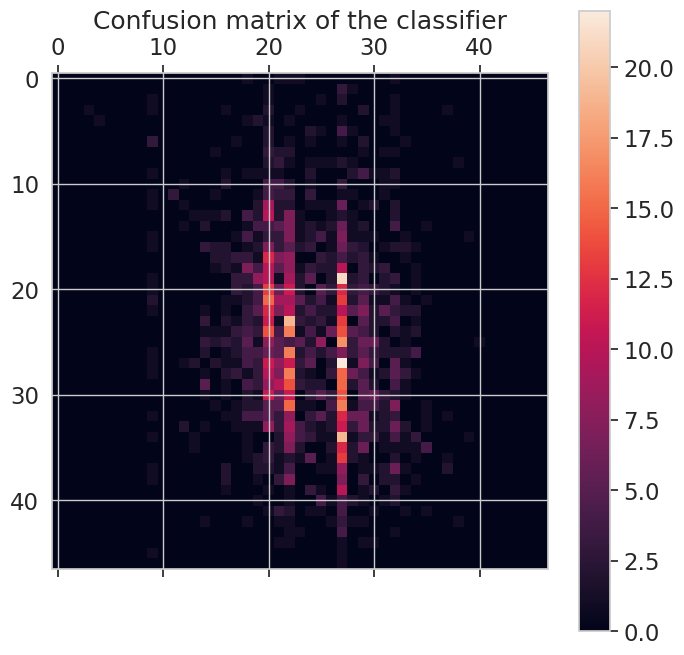

In [53]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [54]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

        41.0       0.00      0.00      0.00         5
        42.0       0.00      0.00      0.00         5
        43.0       0.00      0.00      0.00         6
        44.0       1.00      0.10      0.18        10
        45.0       1.00      0.11      0.20         9
        46.0       0.00      0.00      0.00        11
        47.0       0.00      0.00      0.00        12
        48.0       0.00      0.00      0.00        11
        49.0       0.00      0.00      0.00        13
        50.0       0.04      0.06      0.05        18
        51.0       0.00      0.00      0.00        19
        52.0       1.00      0.14      0.24        22
        53.0       0.17      0.03      0.05        31
        54.0       0.20      0.03      0.05        37
        55.0       0.08      0.05      0.06        44
        56.0       0.00      0.00      0.00        40
        57.0       0.06      0.04      0.05        49
        58.0       0.11    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
